# Stock Prediction using Daily News Headlines
###### Manoj Wajekar
###### Dataset from kaggle.com

##### Description:

There are two channels of data provided in this dataset:

News data: I crawled historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date. (Range: 2008-06-08 to 2016-07-01)
Stock data: Dow Jones Industrial Average (DJIA) is used to "prove the concept". (Range: 2008-08-08 to 2016-07-01)

##### Target Variable:
1" when DJIA Adj Close value rised or stayed as the same;

"0" when DJIA Adj Close value decreased.

### Data Exploration

First, I tried to find out which words has most counts in daily news in order to find out if those words have any predictive value, I used Scatter plot for visualization

In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
import string
import re
import operator
from nltk.corpus import stopwords
data = pd.read_csv('C:\\Users\\Manoj\\Google Drive\\Study Materials\\Spring 17 Courses\\Learning_Python_OOP\\Daily_News\\Combined_News_DJIA.csv')

Merging all news in single column and removing punctuation

In [3]:
data['Merge'] = data['Top1'] + data['Top2'] + data['Top3'] + data['Top4'] + data['Top5'] + data['Top6']+ data['Top7'] + data['Top8'] + data['Top9']+ data['Top10']+ data['Top11']+ data['Top12']+ data['Top13'] + data['Top14'] + data['Top15'] + data['Top16'] + data['Top17'] + data['Top18'] + data['Top19'] + data['Top20']+ data['Top21'] + data['Top22'] + data['Top23']+ data['Top24']+ data['Top25']

Removing common small words using stopwords method

In [7]:
s = set(stopwords.words('english'))
data['Clean'] = ""
n = data['Merge1'].count()
for i in range(n):
    data['Clean'][i] = list(filter(lambda w: w not in s,str(data['Merge1'][i]).lower().split()))
    i=+1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
data_working = pd.concat([data['Date'],data['Label'],data['Clean']], axis=1 , keys = ['Date','Label','Clean'])
data_working['Words'] = ""
i = 0
for row in data_working['Clean']:
    data_working['Words'][i] = list(Counter(row).most_common(20))
    i+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Finding Word Count: To Do:This can be done in simpler way

In [9]:
list_1 = []
list_2 = []
for i in range(data_working['Words'].count()):
    if data_working['Label'][i] == 1:
        list_1 = list_1 + data_working['Words'][i]
    else:
        list_2 = list_2 + data_working['Words'][i]

In [10]:
list_1_dic = {}

for i in range(len(list_1)):
    if list_1[i][0] not in list_1_dic.keys():
        list_1_dic[list_1[i][0]] = list_1[i][1]
    else:
        list_1_dic.update({list_1[i][0]: (list_1_dic[list_1[i][0]] + list_1[i][1])})

In [11]:
list_2_dic = {}

for i in range(len(list_2)):
    if list_2[i][0] not in list_2_dic.keys():
        list_2_dic[list_2[i][0]] = list_2[i][1]
    else:
        list_2_dic.update({list_2[i][0]: (list_2_dic[list_2[i][0]] + list_2[i][1])})

In [12]:
list_1_df = pd.DataFrame.from_dict(list_1_dic, orient='index')
list_1_df =list_1_df.sort_values(0,axis =0,ascending=False)
list_1_df = list_1_df.reset_index()
list_1_df.columns = ['word','count']

In [13]:
list_2_df = pd.DataFrame.from_dict(list_2_dic, orient='index')
list_2_df =list_2_df.sort_values(0,axis =0,ascending=False)
list_2_df = list_2_df.reset_index()
list_2_df.columns = ['word','count']

Plotting Scatter Plot

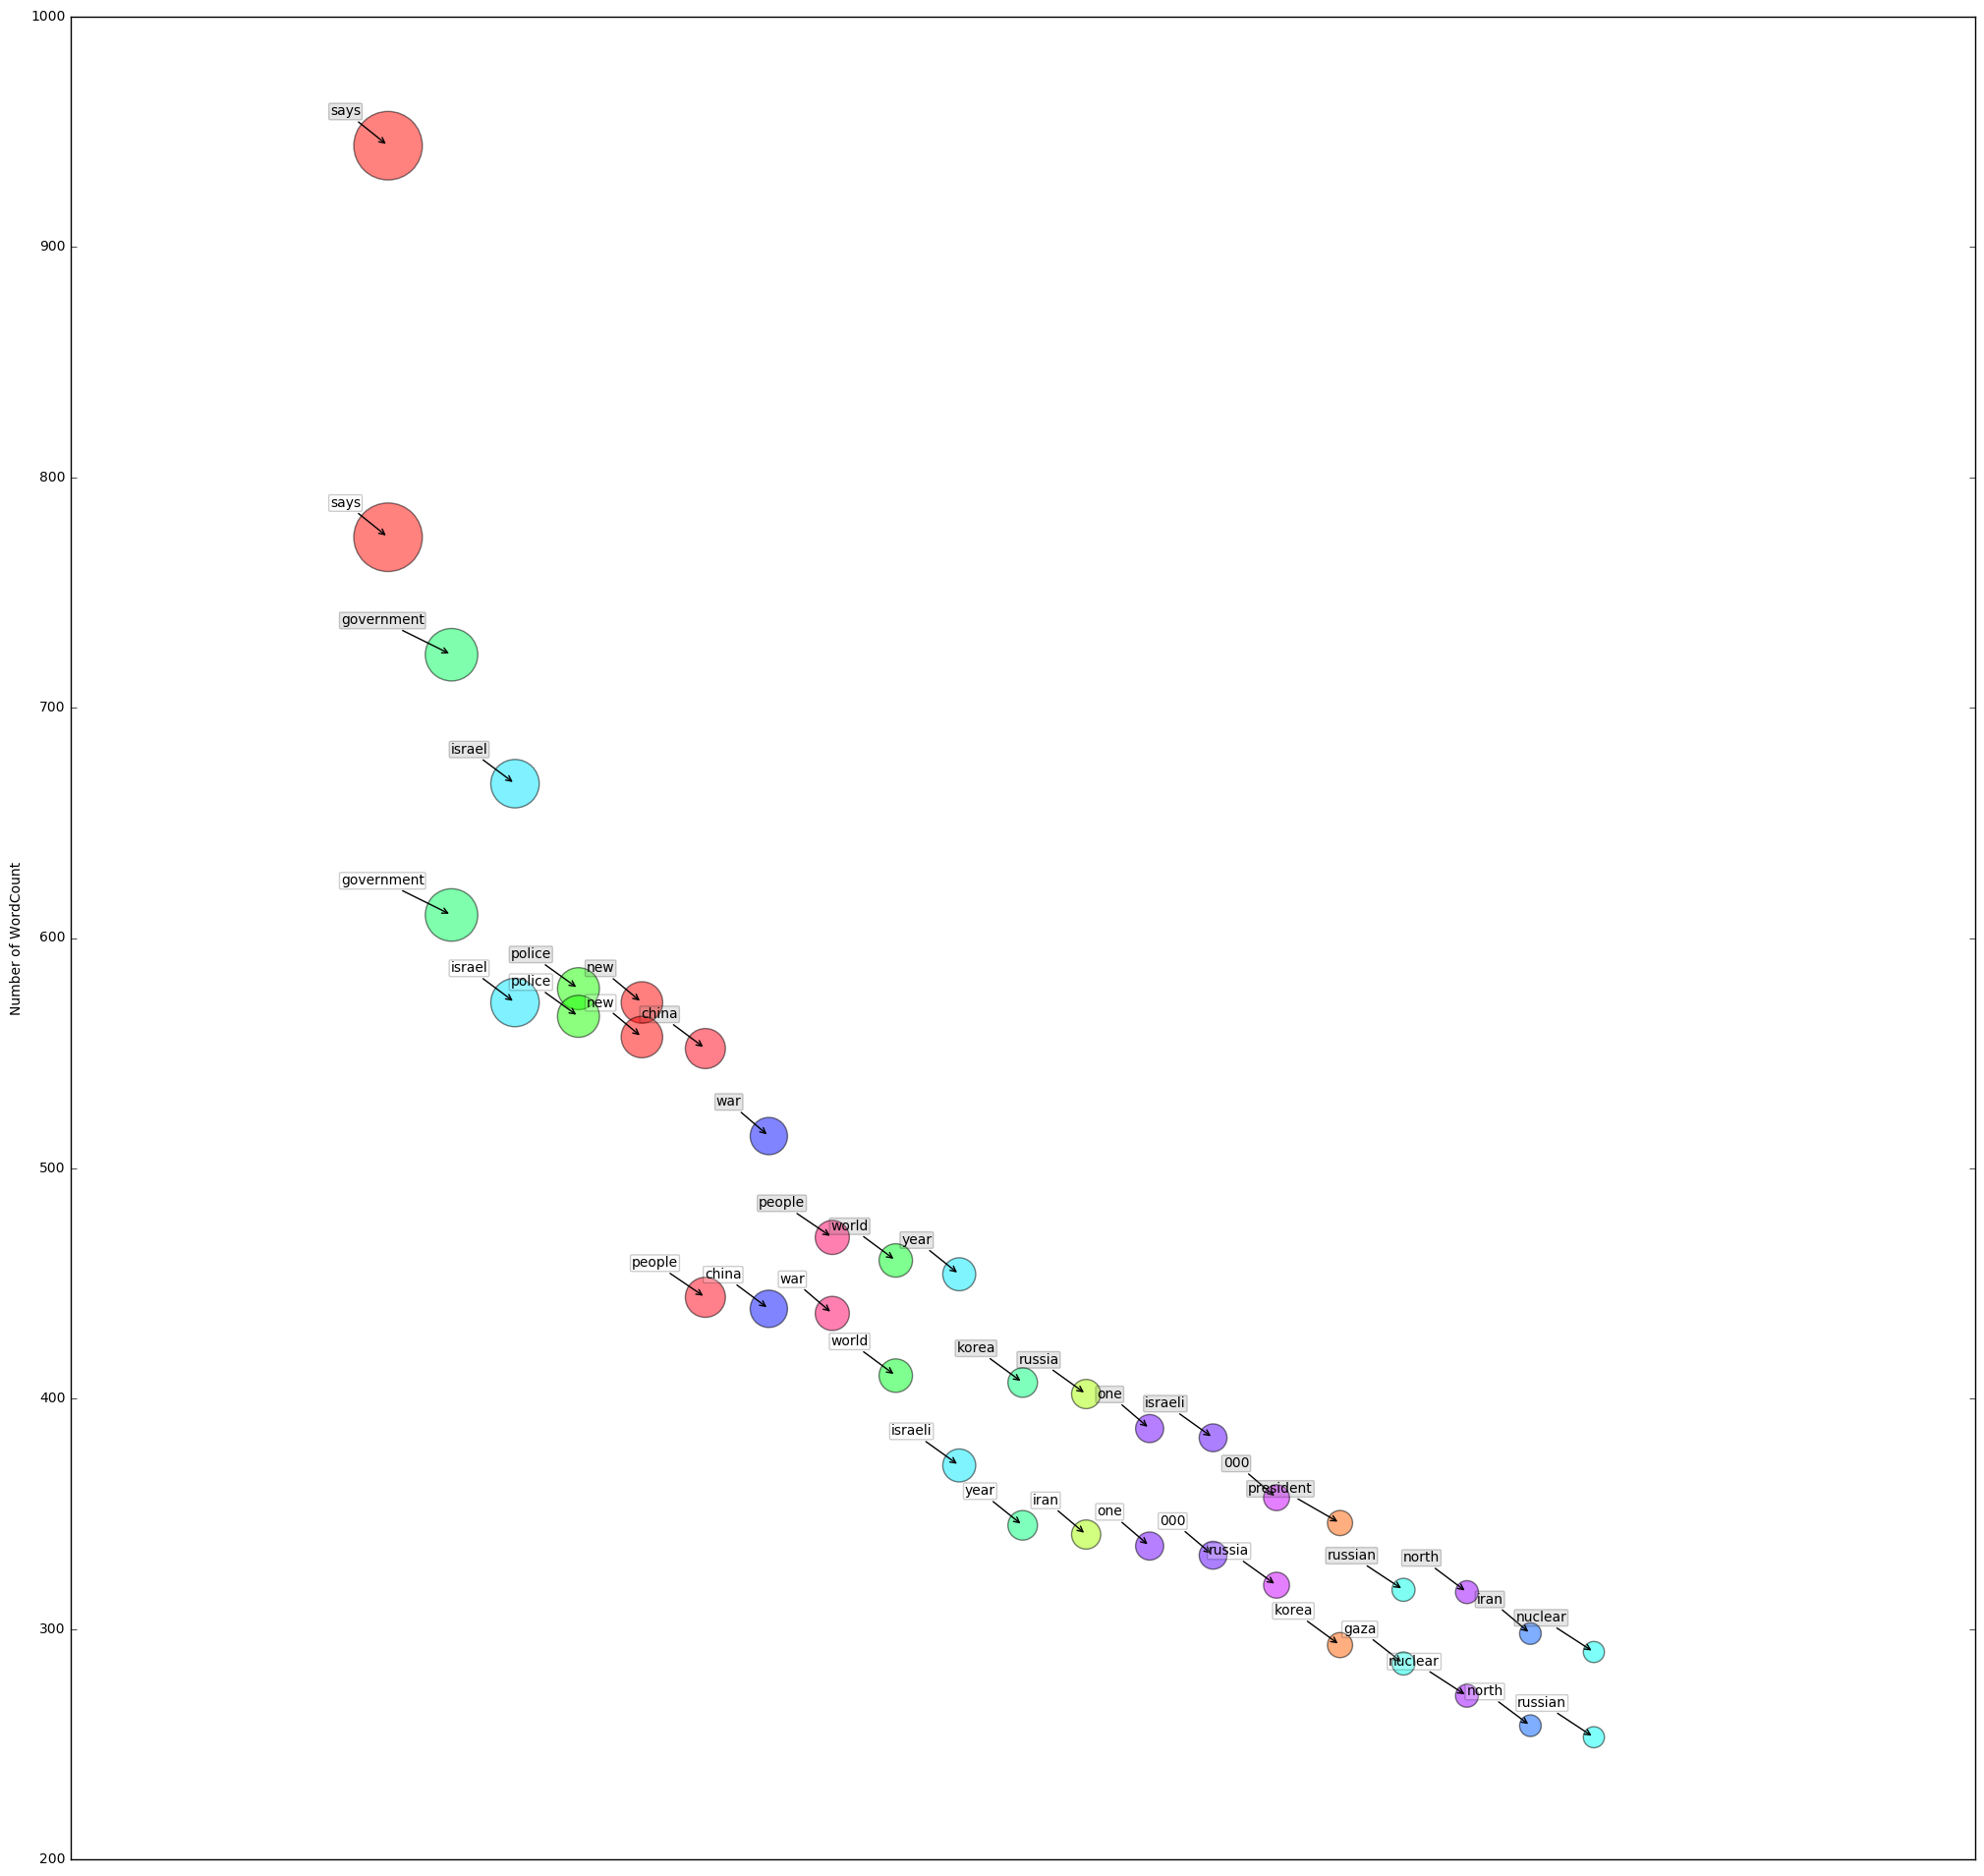

In [14]:
#list_1_df.head(10).plot(kind = 'scatter',x=['count'], y=['word'])

plt.figure(figsize=(25,25))
colors = 2 * np.pi * np.random.rand(20)
area = np.pi * (0.030 * pd.to_numeric(list_1_df.head(20)['count']))**2
#list_1_df.head(5).plot(ax=axe,kind ='scatter',x=list_1_df.head(3).index ,y=list_1_df.head(3)['count'])
plt.scatter(list_1_df.head(20).index,list_1_df.head(20)['count'], c =colors ,s =area,alpha = 0.5,cmap='hsv')
plt.scatter(list_2_df.head(20).index,list_2_df.head(20)['count'], c=colors, s =area,alpha = 0.5,cmap='hsv')
plt.ylabel('Number of WordCount')
plt.xticks([])
#plt.margins(1)
plt.subplots_adjust(bottom=0.15)
#plt.scatter(list_1_df.head(5).index, list_1_df.head(5)['count'],s=area,  label=list_1_df.head(5)['word'], c= 'Blue', alpha = 0.5)

for label, x, y in zip(list_1_df.head(20)['word'], list_1_df.head(20).index, list_1_df.head(20)['count']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='grey', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
for label, x, y in zip(list_2_df.head(20)['word'], list_2_df.head(20).index, list_2_df.head(20)['count']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='white', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()

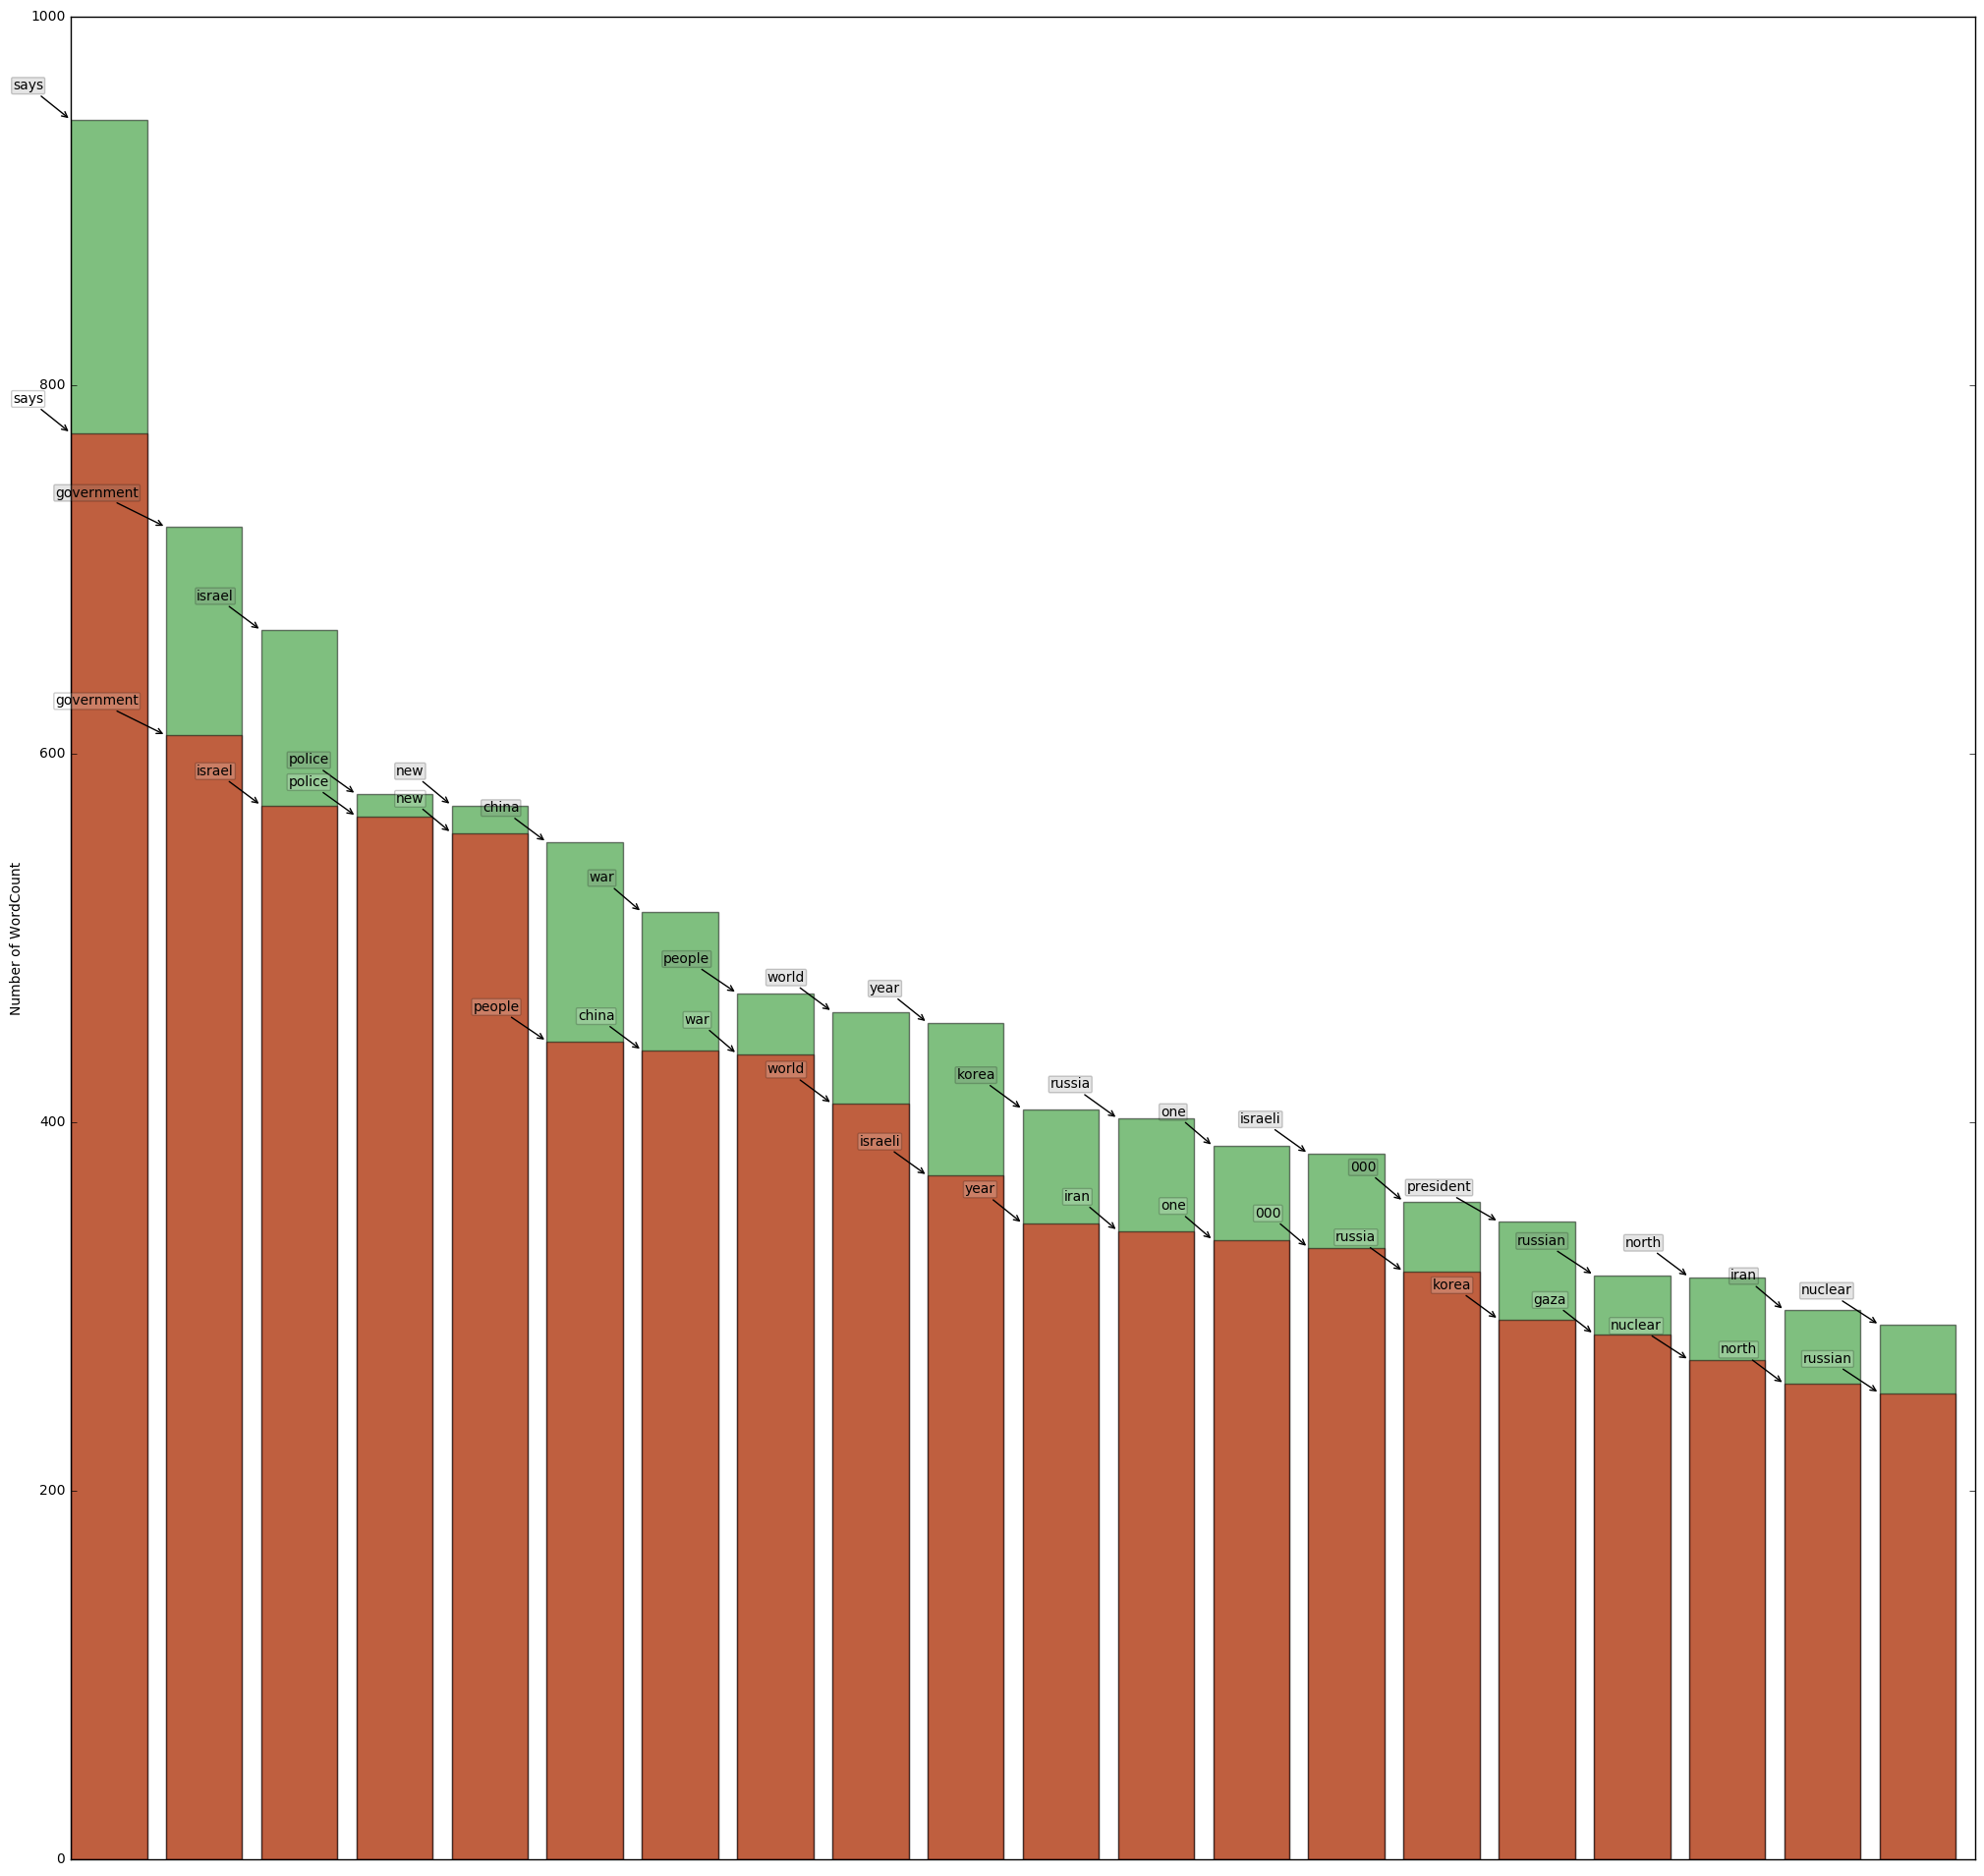

In [15]:
#list_1_df.head(10).plot(kind = 'scatter',x=['count'], y=['word'])

plt.figure(figsize=(25,25))
#colors = 2 * np.pi * np.random.rand(20)
#area = np.pi * (0.030 * pd.to_numeric(list_1_df.head(20)['count']))**2
#list_1_df.head(5).plot(ax=axe,kind ='scatter',x=list_1_df.head(3).index ,y=list_1_df.head(3)['count'])
plt.bar(list_1_df.head(20).index,list_1_df.head(20)['count'],color = 'Green', alpha = 0.5)
plt.bar(list_2_df.head(20).index,list_2_df.head(20)['count'],color = 'Red', alpha = 0.5)
plt.ylabel('Number of WordCount')
plt.xticks([])
#plt.margins(1)
plt.subplots_adjust(bottom=0.15)
#plt.scatter(list_1_df.head(5).index, list_1_df.head(5)['count'],s=area,  label=list_1_df.head(5)['word'], c= 'Blue', alpha = 0.5)

for label, x, y in zip(list_1_df.head(20)['word'], list_1_df.head(20).index, list_1_df.head(20)['count']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='grey', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
for label, x, y in zip(list_2_df.head(20)['word'], list_2_df.head(20).index, list_2_df.head(20)['count']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.1', fc='white', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()

In [35]:
data_train = data.head(1600)
data_test = data.tail(389)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
train_data_features = vectorizer.fit_transform(data_train['Merge1'])
train_data_features = train_data_features.toarray()

In [37]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

1188 000
337 100
16 1000
36 10m
21 120
18 140
68 150
18 160
19 180
22 1967
17 1970s
20 1989
15 1998
18 1bn
67 1st
140 200
25 2000
18 2001
18 2002
29 2003
23 2004
21 2005
41 2006
43 2007
73 2008
87 2009
101 2010
91 2011
94 2012
48 2014
44 2020
26 20th
18 21st
29 250
26 2nd
16 300
16 3rd
44 400
28 447
161 500
16 5bn
21 600
75 700
164 800
18 900
62 abandon
46 abandoned
50 abbas
34 abc
30 abducted
45 abdullah
25 ability
47 able
21 aboard
32 aboriginal
39 abortion
26 abortions
80 about
19 above
15 abroad
17 absence
92 absolute
19 absolutely
1059 absurd
57 abu
39 abuse
16 abused
22 abuses
21 abusing
28 abusive
253 academic
38 accelerated
60 accept
19 accepted
20 accepting
54 accepts
19 access
15 accident
28 accidentally
186 accidents
51 accord
32 according
236 account
70 accountable
18 accounts
59 accusations
33 accuse
28 accused
330 accuses
95 accusing
32 achieve
23 achieved
14 acid
43 across
16 act
265 acta
145 acted
49 acting
22 action
189 actions
59 active
27 activist
154 activists
215 a

In [38]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, data_train['Label'] )

Training the random forest...


In [39]:
test_data_features = vectorizer.fit_transform(data_test['Merge1'])
test_data_features = test_data_features.toarray()

In [40]:
result = forest.predict(test_data_features)

In [41]:
type(result)

numpy.ndarray

In [42]:
output = pd.DataFrame( data={"Date":data_test["Date"], "Predicted":result,"Actual":data_test["Label"]} )

In [43]:
output['Actual'].as_matrix()

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0,

In [44]:
df_confusion = pd.crosstab(output['Actual'], output['Predicted'], rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted    0    1  All
Actual                  
0          140   50  190
1          145   54  199
All        285  104  389


In [45]:
import sklearn.metrics as met
print(met.classification_report(output['Actual'], output['Predicted']))

             precision    recall  f1-score   support

          0       0.49      0.74      0.59       190
          1       0.52      0.27      0.36       199

avg / total       0.51      0.50      0.47       389



In [46]:
'''
from itertools import cycle
import sklearn
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], threshold= sklearn.metrics.roc_curve(output['Actual'].as_matrix()[:i], result[:i],pos_label =0.5)
    roc_auc[i] = auc(fpr[i], tpr[i])
'''
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(output['Predicted'].ravel(), output['Actual'].ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

IndexError: index -1 is out of bounds for axis 1 with size 0

In [ ]:
#fpr, tpr, thresholds = sklearn.metrics.roc_curve(output['Actual'].as_matrix()[:2],result[:2])


In [ ]:
'''
plt.plot(fpr[2],tpr[2])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()
'''

In [ ]:
#plt.scatter(output['Actual'],output['Predicted'])
#plt.show()

In [47]:
'''
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
'''

'\nplt.figure()\nlw = 2\nplt.plot(fpr[0], tpr[0], color=\'darkorange\',\n         lw=lw, label=\'ROC curve (area = %0.2f)\' %roc_auc[2])\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.0])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic example\')\nplt.legend(loc="lower right")\nplt.show()\n'

In [54]:
from sklearn import metrics
print(sklearn.metrics.auc(data_test["Label"].as_matrix(),result, reorder=True))

0.5


In [1]:
data_test["Label"].as_matrix()

NameError: name 'data_test' is not defined